<a href="https://colab.research.google.com/github/TitinFadila/Tugas_M6_Deep_learning/blob/main/makeup_mata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir /content/makeup_mata

In [2]:
!unzip /content/drive/MyDrive/monkey/archive\(2\).zip -d /content/makeup_mata

Archive:  /content/drive/MyDrive/monkey/archive(2).zip
  inflating: /content/makeup_mata/makeup_mata/data set eyelinear/1.jpg  
  inflating: /content/makeup_mata/makeup_mata/data set eyelinear/10.jpg  
  inflating: /content/makeup_mata/makeup_mata/data set eyelinear/100.jpg  
  inflating: /content/makeup_mata/makeup_mata/data set eyelinear/101.jpg  
  inflating: /content/makeup_mata/makeup_mata/data set eyelinear/11.jpg  
  inflating: /content/makeup_mata/makeup_mata/data set eyelinear/12.jpg  
  inflating: /content/makeup_mata/makeup_mata/data set eyelinear/13.jpg  
  inflating: /content/makeup_mata/makeup_mata/data set eyelinear/14.jpg  
  inflating: /content/makeup_mata/makeup_mata/data set eyelinear/15.jpg  
  inflating: /content/makeup_mata/makeup_mata/data set eyelinear/16.jpg  
  inflating: /content/makeup_mata/makeup_mata/data set eyelinear/17.jpg  
  inflating: /content/makeup_mata/makeup_mata/data set eyelinear/18.jpg  
  inflating: /content/makeup_mata/makeup_mata/data set e

In [3]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from keras.optimizers import Adam
from pathlib import Path
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split

In [4]:
dataset_path = Path(r'/content/makeup_mata/makeup_mata')
file_path = list(dataset_path.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path))

In [5]:
file_path = pd.Series(file_path).astype(str)
labels = pd.Series(labels)
df = pd.concat([file_path, labels], axis=1)
df.columns = ['image', 'label']
df.head()

,image,label
0,/content/makeup_mata/makeup_mata/data set eyes...,data set eyeshadow pallete
1,/content/makeup_mata/makeup_mata/data set eyes...,data set eyeshadow pallete
2,/content/makeup_mata/makeup_mata/data set eyes...,data set eyeshadow pallete
3,/content/makeup_mata/makeup_mata/data set eyes...,data set eyeshadow pallete
4,/content/makeup_mata/makeup_mata/data set eyes...,data set eyeshadow pallete


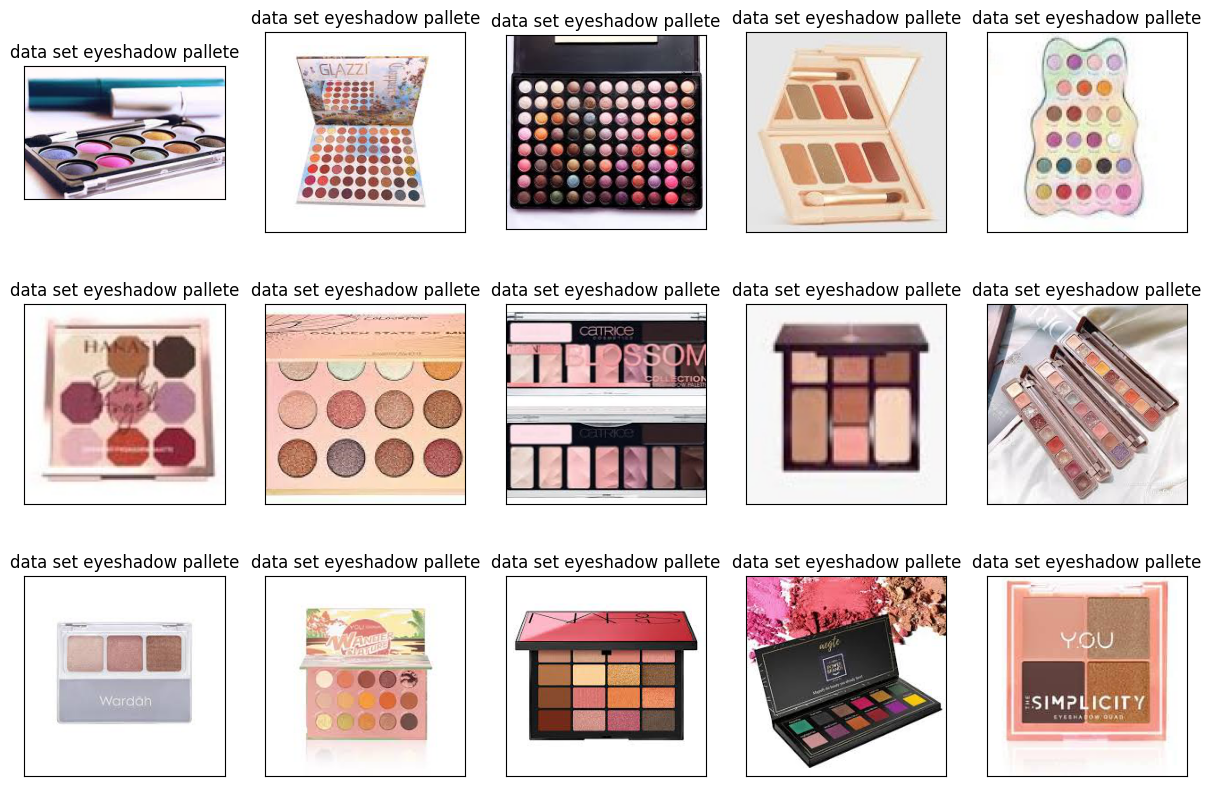

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.image[i]))
    ax.set_title(df.label[i])
    
plt.show()

In [7]:
df.label.value_counts()

data set eyeshadow pallete    100
data set mascara              100
data set eyelinear            100
Name: label, dtype: int64

In [8]:
df = df[df['label'].apply(lambda x: x[-2:] != 'GT')].reset_index(drop=True)
df.label.value_counts()

data set eyeshadow pallete    100
data set mascara              100
data set eyelinear            100
Name: label, dtype: int64

In [9]:
x_train, x_test = train_test_split(df, test_size=0.3,random_state=30)
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=30)

In [10]:
print("Shape of training data", x_train.shape)
print("Shape of test data", x_test.shape)
print("Shape of validation data", x_val.shape)

Shape of training data (168, 2)
Shape of test data (90, 2)
Shape of validation data (42, 2)


In [12]:
image_data_generator = ImageDataGenerator(rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train = image_data_generator.flow_from_dataframe(dataframe=x_train, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
test = image_data_generator.flow_from_dataframe(dataframe=x_test, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
val = image_data_generator.flow_from_dataframe(dataframe=x_val, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical',shuffle=False)

Found 168 validated image filenames belonging to 3 classes.
Found 90 validated image filenames belonging to 3 classes.
Found 42 validated image filenames belonging to 3 classes.


In [13]:
input_shape = (200, 200, 3)

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0

In [27]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)
history = model.fit(train, batch_size= 300, validation_data=val, epochs=50, callbacks=callback)

Epoch 1/50
6/6 [==============================] - 30s 4s/step - loss: 0.4027 - accuracy: 0.8274 - val_loss: 1.1657 - val_accuracy: 0.6429
Epoch 2/50
6/6 [==============================] - 27s 5s/step - loss: 0.3633 - accuracy: 0.8631 - val_loss: 1.1135 - val_accuracy: 0.7381
Epoch 3/50
6/6 [==============================] - 30s 6s/step - loss: 0.4438 - accuracy: 0.7917 - val_loss: 2.1961 - val_accuracy: 0.7143
Epoch 4/50
6/6 [==============================] - 26s 5s/step - loss: 0.4006 - accuracy: 0.8274 - val_loss: 1.5153 - val_accuracy: 0.6667
Epoch 5/50
6/6 [==============================] - 25s 4s/step - loss: 0.4747 - accuracy: 0.8452 - val_loss: 1.0726 - val_accuracy: 0.6429
Epoch 6/50
6/6 [==============================] - 26s 5s/step - loss: 0.4131 - accuracy: 0.8155 - val_loss: 1.0600 - val_accuracy: 0.5952


In [28]:
model.save('model-1.h5')

In [29]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

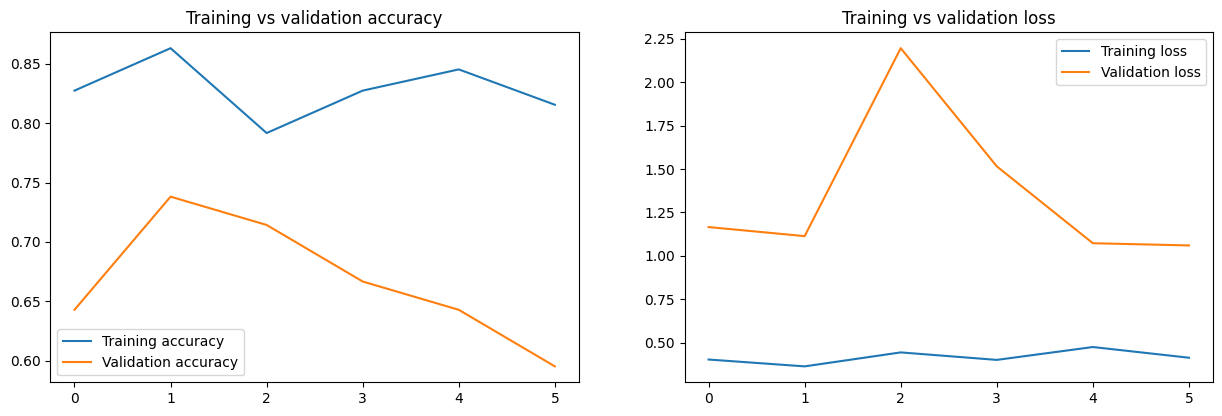

In [30]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")
plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")
plt.show()

In [31]:
pred = model.predict(test)

3/3 [==============================] - 4s 1s/step


In [32]:
pred = np.argmax(pred, axis=1)

In [33]:
labels = train.class_indices

In [34]:
labels

{'data set eyelinear': 0,
 'data set eyeshadow pallete': 1,
 'data set mascara': 2}

In [35]:
labels = dict((v,k) for k, v in labels.items())

In [36]:
labels

{0: 'data set eyelinear',
 1: 'data set eyeshadow pallete',
 2: 'data set mascara'}

In [37]:
y_pred = [labels[k] for k in pred]

In [38]:
print(classification_report(x_test.label, y_pred))

                            precision    recall  f1-score   support

        data set eyelinear       0.54      0.88      0.67        24
data set eyeshadow pallete       0.92      0.73      0.81        33
          data set mascara       0.60      0.45      0.52        33

                  accuracy                           0.67        90
                 macro avg       0.69      0.69      0.67        90
              weighted avg       0.70      0.67      0.67        90



In [39]:
print(confusion_matrix(x_test.label, y_pred))

[[21  1  2]
 [ 1 24  8]
 [17  1 15]]


In [40]:
test_accuracy = model.evaluate(test)[1]

3/3 [==============================] - 4s 1s/step - loss: 0.7997 - accuracy: 0.6444
